In [2]:
#https://toruseo.jp/UXsim/docs/index.html

from uxsim import *
import itertools
import datetime
time = datetime.datetime.now()
seed = None
W = World(
    name="",
    deltan=5,
    tmax=3600, #1 hour simulation
    print_mode=1, save_mode=0, show_mode=1,
    random_seed=seed,
    duo_update_time=600
)
random.seed(seed)

# network definition
"""
    N1  N2  N3  N4 
    |   |   |   |
W1--I1--I2--I3--I4-<E1
    |   |   |   |
    v   ^   v   ^
    S1  S2  S3  S4
"""

signal_time = 20
sf_1=1
sf_2=1

I1 = W.addNode("I1", 1, 0, signal=[signal_time*sf_1,signal_time*sf_2])
I2 = W.addNode("I2", 2, 0, signal=[signal_time*sf_1,signal_time*sf_2])
I3 = W.addNode("I3", 3, 0, signal=[signal_time*sf_1,signal_time*sf_2])
I4 = W.addNode("I4", 4, 0, signal=[signal_time*sf_1,signal_time*sf_2])
W1 = W.addNode("W1", 0, 0)
E1 = W.addNode("E1", 5, 0)
N1 = W.addNode("N1", 1, 1)
N2 = W.addNode("N2", 2, 1)
N3 = W.addNode("N3", 3, 1)
N4 = W.addNode("N4", 4, 1)
S1 = W.addNode("S1", 1, -1)
S2 = W.addNode("S2", 2, -1)
S3 = W.addNode("S3", 3, -1)
S4 = W.addNode("S4", 4, -1)

#E <-> W direction: signal group 0
for n1,n2 in [[W1, I1], [I1, I2], [I2, I3], [I3, I4], [I4, E1]]:
    W.addLink(n2.name+n1.name, n2, n1, length=500, free_flow_speed=50, jam_density=0.2, number_of_lanes=3, signal_group=0)
    
#N -> S direction: signal group 1
for n1,n2 in [[N1, I1], [I1, S1], [N3, I3], [I3, S3]]:
    W.addLink(n1.name+n2.name, n1, n2, length=500, free_flow_speed=30, jam_density=0.2, signal_group=1)

#S -> N direction: signal group 2
for n1,n2 in [[N2, I2], [I2, S2], [N4, I4], [I4, S4]]:
    W.addLink(n2.name+n1.name, n2, n1, length=500, free_flow_speed=30, jam_density=0.2, signal_group=1)
    

# random demand definition every 30 seconds
dt = 30
demand = 2 #average demand for the simulation time
demands = []
for t in range(0, 3600, dt):
    dem = random.uniform(0, demand)
    for n1, n2 in [[N1, S1], [S2, N2], [N3, S3], [S4, N4]]:
        W.adddemand(n1, n2, t, t+dt, dem*0.25)
        demands.append({"start":n1.name, "dest":n2.name, "times":{"start":t,"end":t+dt}, "demand":dem})
    for n1, n2 in [[E1, W1], [N1, W1], [S2, W1], [N3, W1],[S4, W1]]:
        W.adddemand(n1, n2, t, t+dt, dem*0.75)
        demands.append({"start":n1.name, "dest":n2.name, "times":{"start":t,"end":t+dt}, "demand":dem})

W.exec_simulation()
W.analyzer.print_simple_stats()

simulation setting:
 scenario name: 
 simulation duration:	 3600 s
 number of vehicles:	 14445 veh
 total road length:	 6500 m
 time discret. width:	 5 s
 platoon size:		 5 veh
 number of timesteps:	 720
 number of platoons:	 2889
 number of links:	 13
 number of nodes:	 14
 setup time:		 1.02 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.00 s
     600 s|      575 vehs|   4.7 m/s|     0.91 s
    1200 s|      570 vehs|   4.5 m/s|     1.87 s
    1800 s|      570 vehs|   4.5 m/s|     2.71 s
    2400 s|      565 vehs|   4.5 m/s|     3.55 s
    3000 s|      570 vehs|   4.8 m/s|     4.29 s
    3595 s|      580 vehs|   3.1 m/s|     4.95 s
 simulation finished
results:
 average speed:	 6.9 m/s
 number of completed trips:	 6860 / 14445
 average travel time of trips:	 975.2 s
 average delay of trips:	 934.8 s
 delay ratio:			 0.959


In [2]:
W.analyzer.basic_to_pandas()

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,15095,6935,6504975.0,937.992069,6.224492e+06,897.547465


In [3]:
W.analyzer.link_to_pandas()

,link,traffic_volume,vehicles_remain,free_travel_time,average_travel_time,stddiv_travel_time
0,I1W1,5660,5,10.000000,11.118056,3.067519
1,I2I1,4240,60,10.000000,41.381944,11.823351
2,I3I2,3130,75,10.000000,81.673611,19.365214
3,I4I3,2035,95,10.000000,142.569444,35.075247
4,E1I4,940,105,10.000000,390.909722,136.623109
5,N1I1,1795,50,16.666667,102.344907,12.734190
6,I1S1,370,0,16.666667,15.018519,0.174703
7,N3I3,1475,60,16.666667,147.421296,23.145607
8,I3S3,300,5,16.666667,15.018519,0.174703
9,I2N2,300,5,16.666667,15.018519,0.174703


In [4]:
W.analyzer.link_traffic_state_to_pandas().head(20)

,link,t,x,delta_t,delta_x,q,k,v
0,I1W1,0,0,120,250,1.130556,0.024028,47.052023
1,I1W1,0,250,120,250,1.026389,0.020528,50.000000
2,I1W1,120,0,120,250,1.452778,0.029056,50.000000
3,I1W1,120,250,120,250,1.543056,0.030861,50.000000
4,I1W1,240,0,120,250,1.647222,0.036000,45.756173
5,I1W1,240,250,120,250,1.572222,0.031444,50.000000
6,I1W1,360,0,120,250,1.595833,0.034528,46.218825
7,I1W1,360,250,120,250,1.650000,0.033000,50.000000
8,I1W1,480,0,120,250,1.548611,0.032389,47.813036
9,I1W1,480,250,120,250,1.458333,0.029167,50.000000


In [5]:
W.analyzer.od_to_pandas()

,orig,dest,total_trips,completed_trips,free_travel_time,average_travel_time,stddiv_travel_time
0,N1,S1,655,370,33.333333,780.000000,464.744190
1,S2,N2,655,300,33.333333,920.333333,564.138626
2,N3,S3,655,300,33.333333,919.833333,564.873855
3,S4,N4,655,305,33.333333,897.131148,562.976908
4,E1,W1,2495,870,50.000000,1066.925287,696.755123
5,N1,W1,2495,1420,26.666667,765.070423,462.064597
6,S2,W1,2495,1155,36.666667,938.419913,556.258755
7,N3,W1,2495,1125,46.666667,997.688889,542.918853
8,S4,W1,2495,1090,56.666667,1073.211009,520.570886


In [4]:
import pandas as pd  
from datetime import timedelta

data = W.analyzer.vehicles_to_pandas()

df = pd.DataFrame(columns=['name','origin', 'destination', 'time', 'link', 'position', 'spacing', 'speed'])
for i in range(0, 20):
    new_row = pd.DataFrame({
        'name' : [data ['name'][i]],
        'origin' : [data['orig'][i]],
        'destination' : [data['dest'][i]],
        'time' : [(time + timedelta(seconds=int(data['t'][i]))).strftime('%d/%m/%Y %H:%M:%S')],
        'link' : [data['link'][i]],
        'position' : [data['x'][i]],
        'spacing' : [data['s'][i]],
        'speed' :  [data['v'][i]]
    })
    df = pd.concat([df, new_row], ignore_index=True)

display(df)


,name,origin,destination,time,link,position,spacing,speed
0,0,N1,S1,28/05/2024 15:34:06,N1I1,0.0,150.0,30.0
1,0,N1,S1,28/05/2024 15:34:11,N1I1,125.0,175.0,25.0
2,0,N1,S1,28/05/2024 15:34:16,N1I1,275.0,175.0,30.0
3,0,N1,S1,28/05/2024 15:34:21,N1I1,425.0,50.0,30.0
4,0,N1,S1,28/05/2024 15:34:26,N1I1,450.0,25.0,5.0
5,0,N1,S1,28/05/2024 15:34:31,N1I1,450.0,-1.0,0.0
6,0,N1,S1,28/05/2024 15:34:36,I1S1,100.0,-1.0,10.0
7,0,N1,S1,28/05/2024 15:34:41,I1S1,250.0,-1.0,30.0
8,0,N1,S1,28/05/2024 15:34:46,I1S1,400.0,-1.0,30.0
9,0,N1,S1,28/05/2024 15:34:46,trip_end,-1.0,-1.0,-1.0


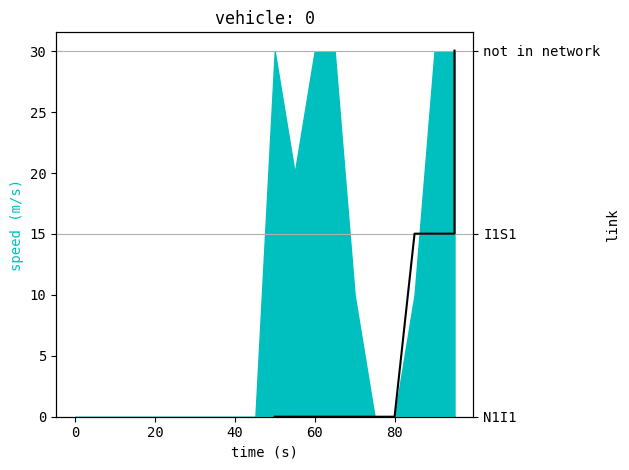

In [46]:
W.analyzer.plot_vehicle_log("0")

In [47]:
W.analyzer.network_anim(detailed=0, network_font_size=1, figsize=(6,6))

 generating animation...


100%|██████████| 30/30 [00:09<00:00,  3.21it/s]


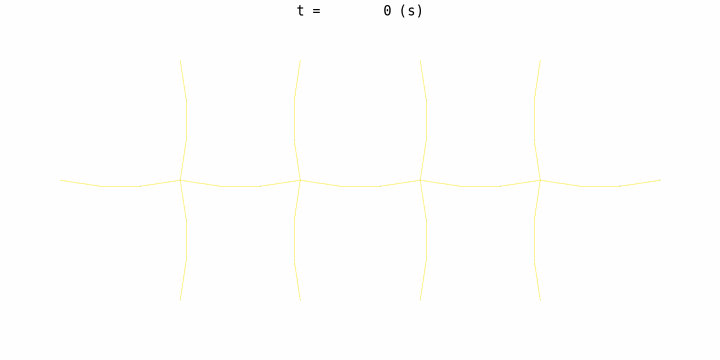

In [48]:
from IPython.display import display, Image
with open("out/anim_network0.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))

In [49]:
W.analyzer.network_fancy(animation_speed_inverse=15, sample_ratio=0.3, interval=3, trace_length=5, network_font_size=1)


 generating animation...


100%|██████████| 360/360 [01:12<00:00,  4.98it/s]


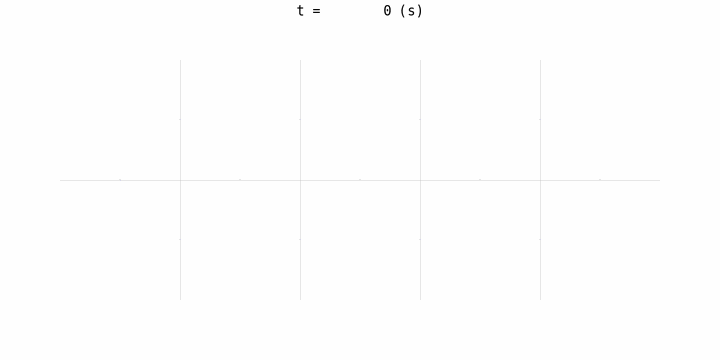

In [50]:
with open("out/anim_network_fancy.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))

In [51]:
df = W.analyzer.link_to_pandas()
df['av_demand'] = (df['traffic_volume']+df['vehicles_remain'])/3600
df['signal_time'] = signal_time
df

,link,traffic_volume,vehicles_remain,free_travel_time,average_travel_time,stddiv_travel_time,av_demand,signal_time
0,I1W1,5620,5,10.000000,11.222222,3.056061,1.562500,20
1,I2I1,4200,60,10.000000,41.243056,12.148529,1.183333,20
2,I3I2,3090,75,10.000000,80.868056,20.727480,0.879167,20
3,I4I3,1980,95,10.000000,142.854167,44.658576,0.576389,20
4,E1I4,890,105,10.000000,397.444444,162.645865,0.276389,20
5,N1I1,1775,50,16.666667,102.053241,12.508063,0.506944,20
6,I1S1,350,0,16.666667,15.039352,0.253057,0.097222,20
7,N3I3,1480,60,16.666667,143.081019,24.953545,0.427778,20
8,I3S3,290,5,16.666667,15.039352,0.253057,0.081944,20
9,I2N2,285,5,16.666667,15.039352,0.253057,0.080556,20
